## King County Housing with Multiple Regression

Authors: Tasha Kanyiva, Mercy Ronoh, Andrew Maina, Ashley Simiyu, Diana Mbuvi

# Table of contents

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Regression Results
6. Conclusion and Recommendation

# Renaissance Realty

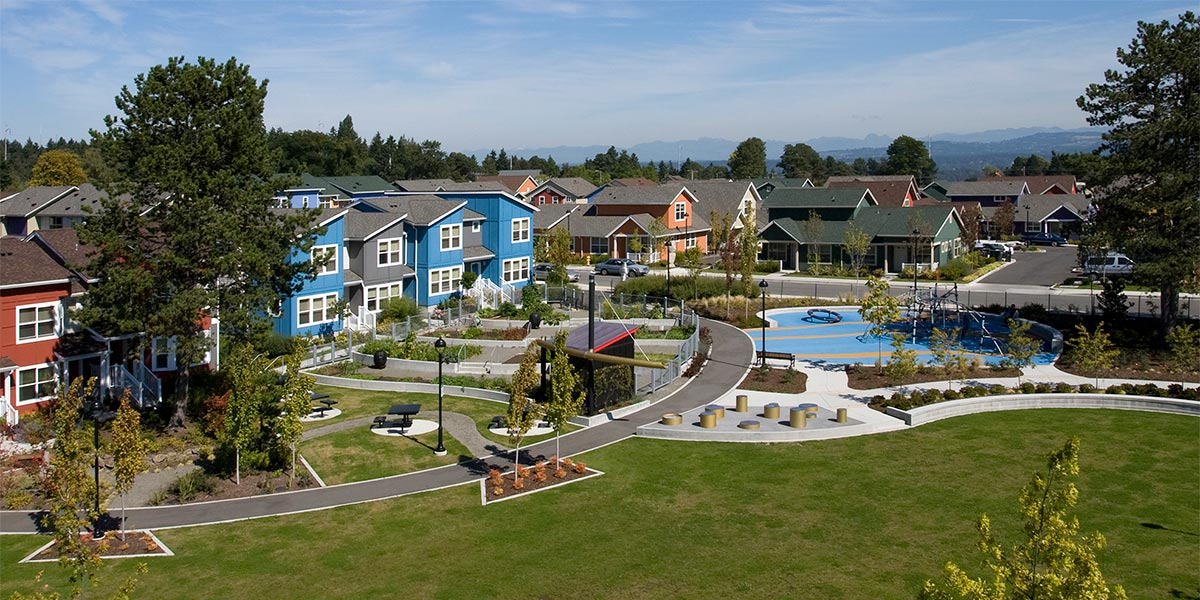

## 1. Business Understanding


### Overview

Renaissance Realty is a luxurious and well-known Real Estate Company which helps homeowners to buy or sell homes. Our team is tasked with analyzing housing data in King County, aiming to predict house sale. Through meticulous iterations of linear regression models, we've identified crucial factors correlated with higher property values. Notably, square footage of living space, building grade are all influential variables. By leveraging these insights, our objective is to assist the company in making strategic decisions, emphasizing features such as spacious living areas, high-grade construction, and desirable amenities to maximize returns in the competitive King County housing market.



<div style="display: flex; justify-content: space-between;">
    <img src="https://images.unsplash.com/flagged/photo-1564767609342-620cb19b2357?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1yZWxhdGVkfDF8fHxlbnwwfHx8fHw%3D" style="width: 30%; margin: 0; padding: 0;">
    <img src="https://images.unsplash.com/photo-1496449903678-68ddcb189a24?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8cmVuYWlzc2FuY2UlMjByZWFsJTIwZXN0YXRlfGVufDB8fDB8fHww" style="width: 30%; margin: 0; padding: 0;">
    <img src="https://images.unsplash.com/photo-1507089947368-19c1da9775ae?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1yZWxhdGVkfDZ8fHxlbnwwfHx8fHw%3D" style="width: 30%; margin: 0; padding: 0;">
</div>


### Business Problem

The current business problem is to come up with data driven solutions that can give potential homeowners insight on the best possible investments when it comes to buying or selling houses. Renaissance Realty are keen on identifying the factors that significantly influence higher home sale prices. In our analysis, we will assess, square footage of living space, and elements, including proximity to the waterfront, the grade and condition of the houses. The goal is to pinpoint the key qualities that correlate strongly with elevated home sale prices, enabling strategic decision-making in our projects.



### Project Objective

The objective is this project is to help our stakeholder, Renaisannce Realty create and execute a data analytics system that makes use of past property data to forecast how much a home's projected worth might rise in the future depending on several remodelling criteria. By doing this, the real estate company hopes to provide homeowners with individualised and insightful guidance, assisting them in making well-thought-out remodelling choices that will both improve the quality of their living areas and increase the value of their properties when they are sold.


## 2. Data Understanding

We got information from the King County House Data, a dataset given to us at the start of the project. This file has details about 21,597 homes in King County It includes info on things like the number of bedrooms/bathrooms, floors, square footage, zip code, and condition of each home.


### Exploratory Data Analysis

In [1]:
# Datasets: KC House dataset
!ls data/

column_names.md
kc_house_data.csv


In [2]:
# Inspect content for the columns
!cat data/column_names.md

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In [3]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [4]:
# Load the dataset
kc_house_data = pd.read_csv('./data/kc_house_data.csv', encoding='utf8')
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check last 5 values
kc_house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
# Check a random sample of the data
kc_house_data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7438,1592000680,5/28/2014,665000.0,3,2.50,2190,10370,2.0,NaN,NONE,...,9 Better,2190,0.0,1987,0.0,98074,47.6218,-122.030,2470,10472
3814,2785000110,6/5/2014,540000.0,4,2.25,1330,8400,1.5,NO,NONE,...,8 Good,1330,0.0,1962,0.0,98005,47.6078,-122.169,2270,10146
21258,8673400020,3/11/2015,590000.0,3,3.00,1740,1100,3.0,NO,NONE,...,8 Good,1740,0.0,2007,0.0,98107,47.6700,-122.391,1370,1180
395,3649100320,4/30/2015,330000.0,2,1.00,1220,10000,1.0,NO,NONE,...,7 Average,1220,0.0,1950,0.0,98028,47.7405,-122.241,2000,9600
5948,7852020250,6/2/2014,725995.0,4,2.50,3190,7869,2.0,NO,AVERAGE,...,9 Better,3190,0.0,2001,0.0,98065,47.5317,-121.866,2630,6739
6717,5700002125,6/10/2014,480000.0,4,1.75,2320,4322,1.0,NO,NONE,...,7 Average,1140,1180.0,1910,NaN,98144,47.5755,-122.289,1820,4322
2320,2211700160,5/12/2014,450000.0,3,1.50,1770,17208,1.0,NO,NONE,...,8 Good,1160,610.0,1959,0.0,98006,47.5659,-122.117,2450,17118
4016,4459800100,4/22/2015,390000.0,2,1.00,980,3800,1.0,NO,NONE,...,7 Average,980,0.0,1926,0.0,98103,47.6903,-122.340,1520,5010
15737,6744700427,5/7/2014,540000.0,7,5.75,3700,7647,2.0,NO,FAIR,...,8 Good,3700,0.0,1948,1984.0,98155,47.7393,-122.289,2510,7479
18792,2721049061,7/9/2014,625000.0,3,1.75,3160,76230,1.0,NO,NONE,...,8 Good,2160,1000.0,1978,0.0,98001,47.2740,-122.287,1990,45789


In [7]:
# Check data types and column information
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Get descriptive statistics (mean, min-max, std etc.)
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Investigate unique values in each column
Let's investigate unique values in the columns to find any uncaught null values or incorrect data types

In [9]:
# Date column
kc_house_data['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/30/2014      1
3/8/2015        1
1/10/2015       1
1/17/2015       1
5/24/2015       1
Name: date, Length: 372, dtype: int64

In [10]:
# Price column
kc_house_data['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [11]:
# Bedrooms column
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
# Bathrooms column
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [13]:
# Sqft_living column
kc_house_data['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [14]:
# Sqft_lot column
kc_house_data['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [15]:
# Floors column
kc_house_data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [16]:
# Waterfront column
kc_house_data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [17]:
# View column
kc_house_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [18]:
# condition column
kc_house_data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [19]:
# Grade column
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
# Sqft_above column
kc_house_data['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [21]:
# Sqft_basement column
kc_house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
792.0         1
1248.0        1
2600.0        1
2810.0        1
875.0         1
Name: sqft_basement, Length: 304, dtype: int64

There is a **?** on **454** records in sqft_basement meaning they are null values. The datatype of the column values is object thus needs to be converted to float measurements after replacing the null values

In [22]:
# Sqft_living column
kc_house_data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [23]:
# Yr_renovated column
kc_house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# Zipcode column
kc_house_data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [25]:
# Latitude column
kc_house_data['lat'].value_counts()

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [26]:
# Longitude column
kc_house_data['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

In [27]:
# sqft_living15 column
kc_house_data['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [28]:
# sqft_lot15 column
kc_house_data['sqft_lot15'].value_counts()

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

## 3. Data Preparation

With the understanding of the data, the next step is to clean up, prepare and preprocess for analysis.


### Data Cleaning


In [29]:
# dropping unecessary columns
kc_house_data.drop(columns = ['id', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [30]:
# Find and count null entries
kc_house_data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
dtype: int64

In [31]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 2.5+ MB


In [32]:
# converting the date to datetime format
kc_house_data['date']=pd.to_datetime(kc_house_data['date'])
#extracting year from the date column
kc_house_data.date=kc_house_data['date'].dt.year

# introducing a new column called sell year
kc_house_data['sell_yr'] = pd.to_datetime(kc_house_data['date'],format='%Y').dt.year

In [33]:
kc_house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sell_yr
0,2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,98178,2014
1,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,2014
2,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,2015
3,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,2014
4,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,2015


In [34]:
# removing the date column
kc_house_data.drop(columns =['date'], inplace = True)

In [35]:
# Function to get percentage of null values in each column
def getNullValues(dataFrame):
    """Calculates the percentage of data that is missing in each column"""
    percentage_of_null_values = 0
    for col in dataFrame.columns:
        percentage_of_null_values = dataFrame[col].isna().sum() / dataFrame.shape[0] * 100
        print(f"{round(percentage_of_null_values, 2)}% - {col}")
getNullValues(kc_house_data)

0.0% - price
0.0% - bedrooms
0.0% - bathrooms
0.0% - sqft_living
0.0% - sqft_lot
0.0% - floors
11.0% - waterfront
0.29% - view
0.0% - condition
0.0% - grade
0.0% - sqft_above
0.0% - sqft_basement
0.0% - yr_built
0.0% - zipcode
0.0% - sell_yr


#### a. Square footage of basement

In order to carry out further investigation, we need to convert the **?** in sqft_basement to an empty value then correct the data type.

In [36]:
# Replace ? with nan
kc_house_data['sqft_basement'].replace(to_replace=['?'], value=[np.nan], inplace=True)
kc_house_data['sqft_basement'].isna().sum()

454

In [37]:
?pd.Series.apply

In [38]:
# Fill null values in sqft_basement with 0 and convert the column to int datatype
kc_house_data['sqft_basement'].fillna(0, inplace=True)
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].apply(lambda value: float(value))
kc_house_data['sqft_basement'].isna().sum()

0

#### b. View

In [39]:
kc_house_data['view'].isna().sum()

63

In [40]:
# Fill the null values in the view column with the mode value (NONE)
kc_house_data['view'].fillna(kc_house_data['view'].mode()[0], inplace=True)

In [41]:
kc_house_data['view'].isna().sum()

0

In [42]:
kc_house_data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
sell_yr             0
dtype: int64

#### c.Waterfront

In [43]:
# Fill null values in the waterfront column with the mode of the column data
mode_value = kc_house_data['waterfront'].mode()[0]
kc_house_data['waterfront'].fillna(mode_value, inplace=True)
kc_house_data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sell_yr        21597 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 2.5+ MB


In [44]:
kc_house_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,zipcode,sell_yr
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.605368,0.321108,0.053953,-0.053402,0.003727
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.297229,0.155670,-0.154092,-0.009949
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.278485,0.507173,-0.204786,-0.026577
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.428660,0.318152,-0.199802,-0.029014
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.015031,0.052946,-0.129586,0.005628
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,-0.241866,0.489193,-0.059541,-0.022352
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,0.083050,-0.024487,0.028923,-0.005018
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,-0.051175,0.424037,-0.261570,-0.023782
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,-0.051175,1.000000,-0.130085,0.073271,-0.014997
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,0.424037,-0.130085,1.000000,-0.347210,0.003574


### Data Analysis and Visualization

<AxesSubplot:>

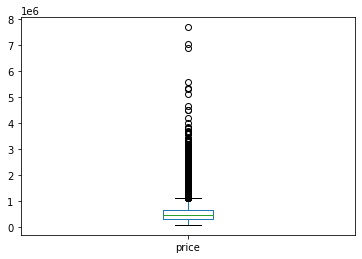

In [45]:
kc_house_data['price'].plot(kind='box')

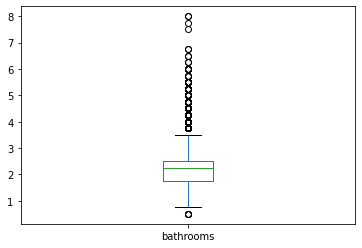

In [46]:
kc_house_data['bathrooms'].plot(kind='box');

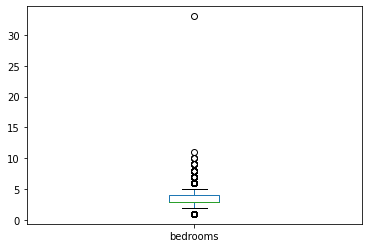

In [47]:
kc_house_data['bedrooms'].plot(kind='box');

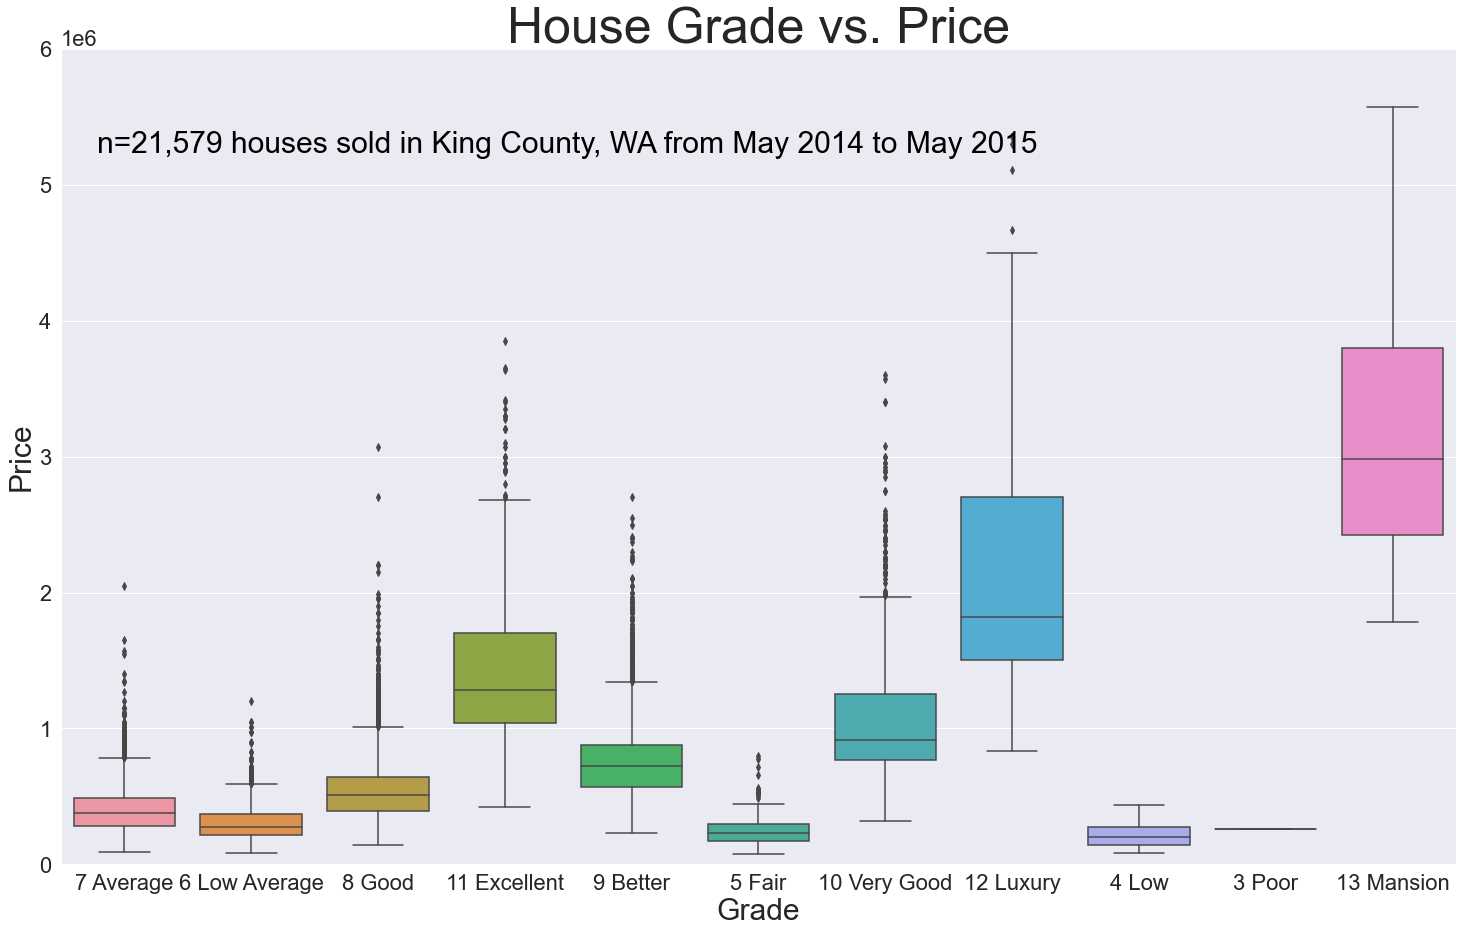

In [48]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="grade", y="price", data=kc_house_data)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

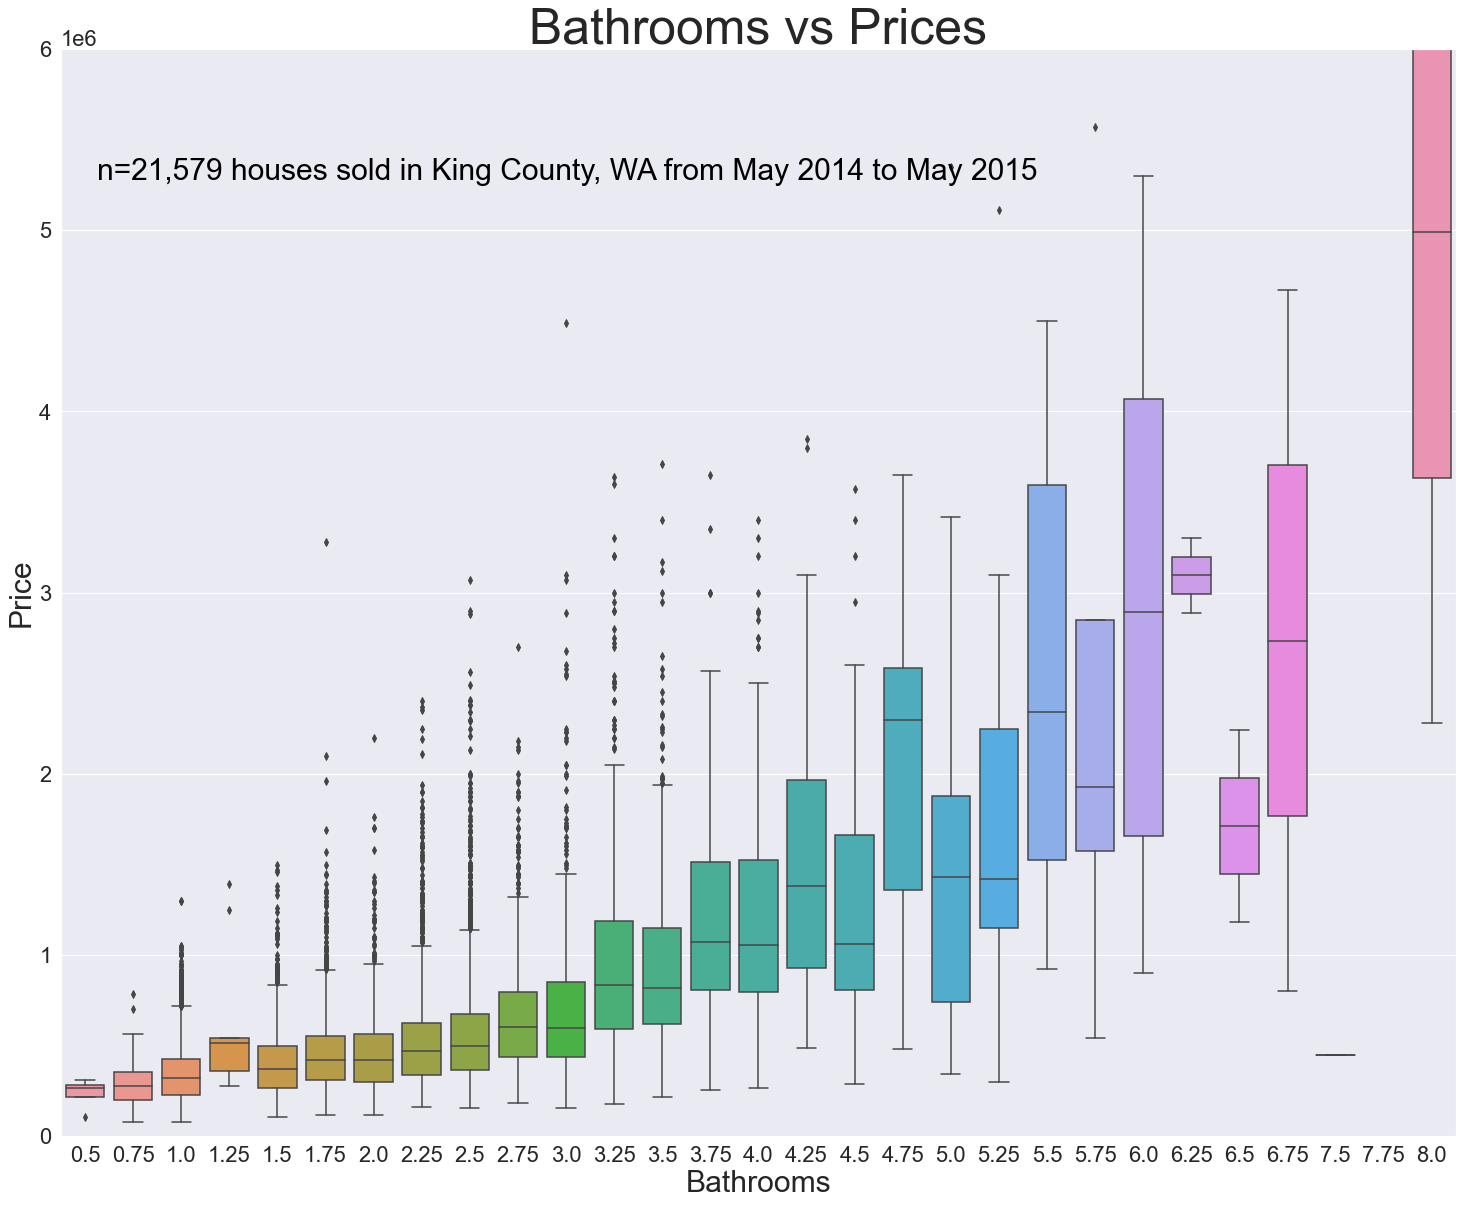

In [162]:
plt.figure(figsize=(25,20))
sns.set(font_scale=2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x="bathrooms", y="price", data=kc_house_data)
ax.set_title('Bathrooms vs Prices', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Bathrooms', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)
ax.text(.7, .9, 'n=21,579 houses sold in King County, WA from May 2014 to May 2015',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);
# plt.savefig('./visualizations/grade.png')

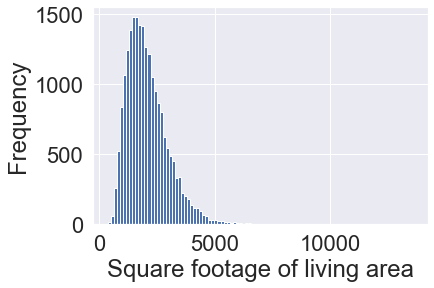

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(kc_house_data['sqft_living'], bins=100);
# kc_house_data['sqft_living'].hist()

In [50]:
print("Skewness:", kc_house_data['sqft_living'].skew())
print("Kurtosis:", kc_house_data['sqft_living'].kurt())

Skewness: 1.473215455425834
Kurtosis: 5.252101950846816


In [51]:
mean = kc_house_data['sqft_living'].mean()
mean

2080.3218502569803

In [52]:
std = kc_house_data['sqft_living'].std()
std

918.1061250800805

In [53]:
std_1 = mean + std
std_1m = mean - std
std_15 = mean + (1.5*std)
std_15m = mean - (1.5*std)

In [54]:
df = kc_house_data.loc[(kc_house_data['sqft_living']<std_15) & (kc_house_data['sqft_living']>std_15m)]

Skewness: 0.34744362219781993
Kurtosis: -0.7020749344943029


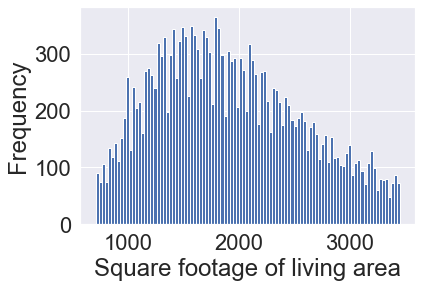

In [55]:
fig, ax = plt.subplots()
ax.set_xlabel('Square footage of living area')
ax.set_ylabel('Frequency')
ax.hist(df['sqft_living'], bins=100);
print("Skewness:", df['sqft_living'].skew())
print("Kurtosis:", df['sqft_living'].kurt())

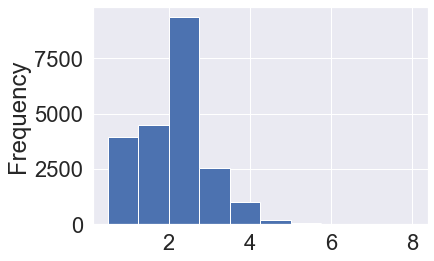

In [56]:
kc_house_data['bathrooms'].plot(kind='hist');

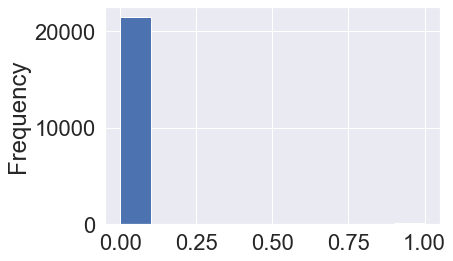

In [57]:
kc_house_data['waterfront'].plot(kind='hist');

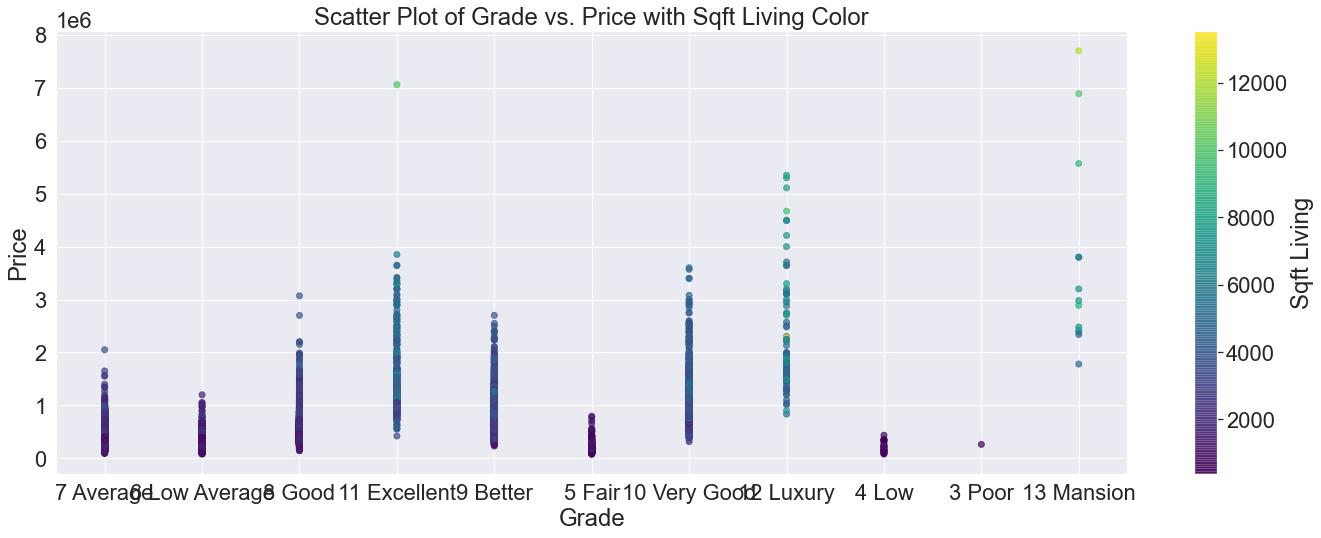

In [66]:
plt.figure(figsize=(20, 8))
scatter = plt.scatter(x='grade', y='price', c='sqft_living', cmap='viridis', data=kc_house_data, alpha=0.7)
plt.colorbar(scatter, label='Sqft Living')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Scatter Plot of Grade vs. Price with Sqft Living Color')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


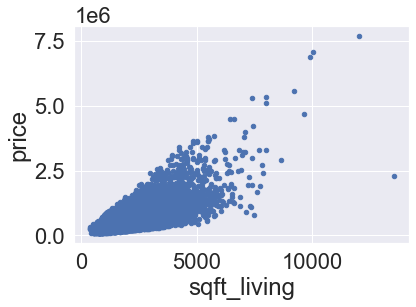

In [61]:
kc_house_data.plot.scatter(x='sqft_living', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


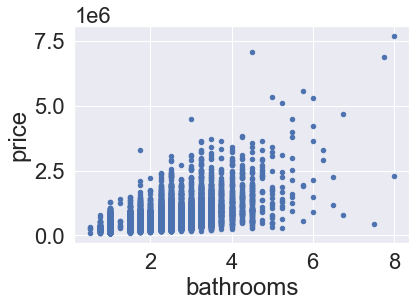

In [62]:
kc_house_data.plot.scatter(x='bathrooms', y='price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


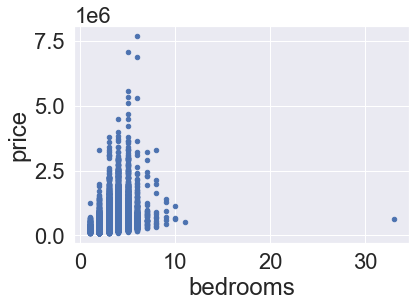

In [63]:
kc_house_data.plot.scatter(x='bedrooms', y='price');

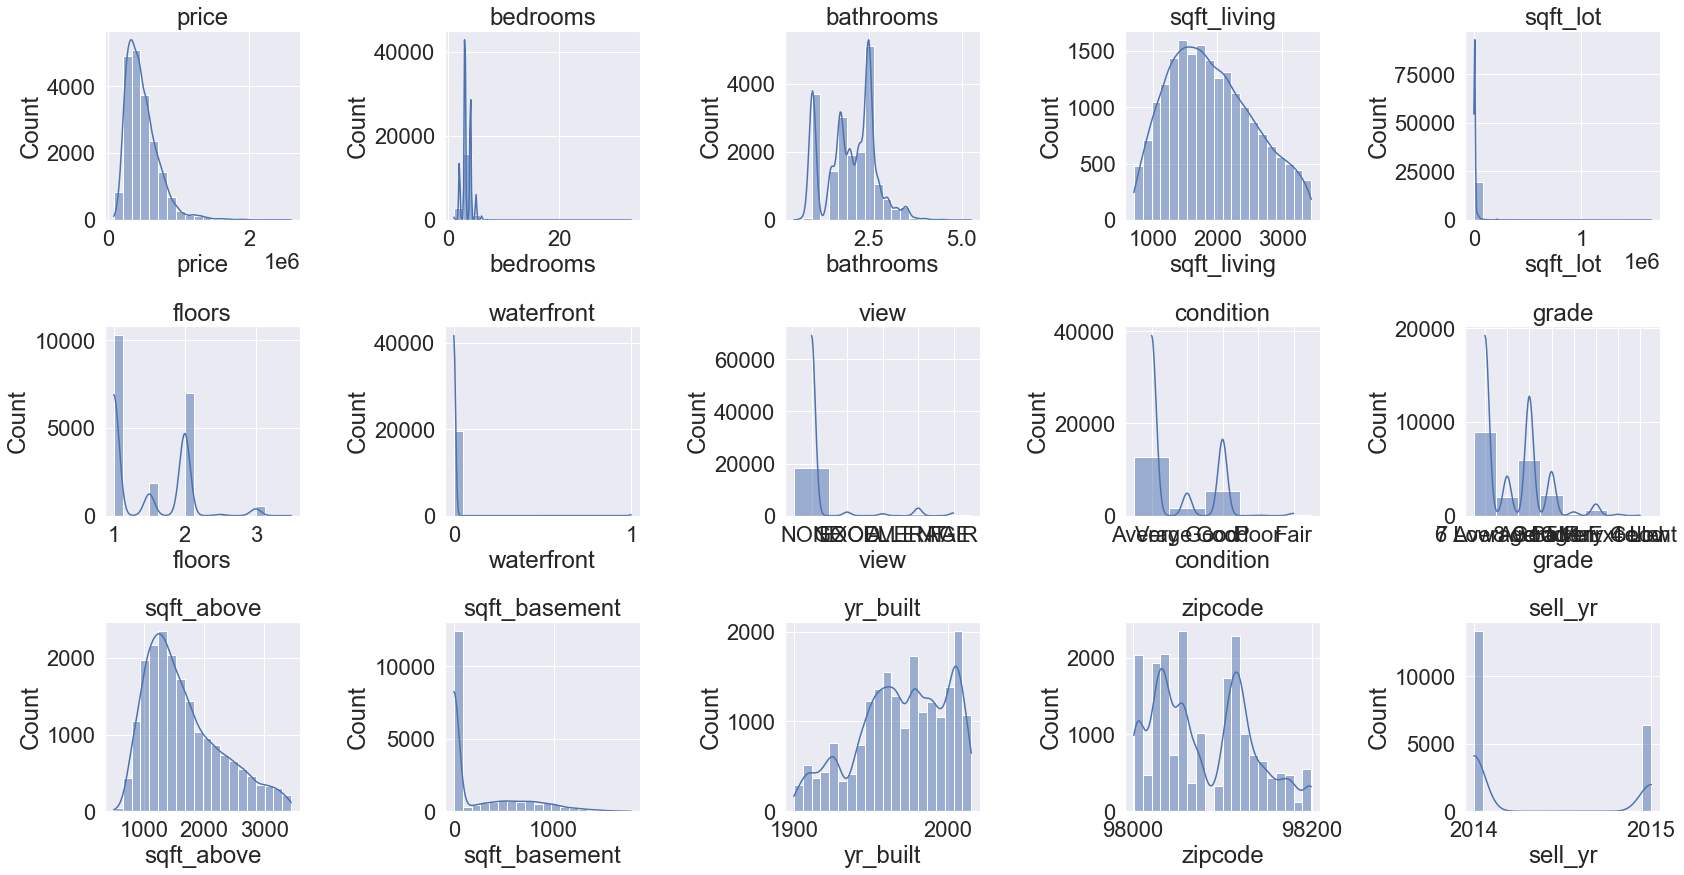

In [64]:
plt.figure(figsize=(24, 16))
for feature in kc_house_data.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show();

## 4. Modelling


This  comprises linear regression models applied to our original, cleaned, and modified datasets. We iteratively refined the models, progressively enhancing their performance to identify the most suitable fit for our data. The notebook encompasses  different iterations of the model, outlining the steps taken to enhance them, exploring essential assumptions, and presenting the resulting outputs. The models are assessed sequentially, leading to a comprehensive evaluation and final conclusion.


### Model 1

This is the first model it takes the price versus sqft_living as feature. We create a simple linear regression baseline model using two variables, **price**(target) and **square footage of the living space** in a home.

In [68]:
# define features and target
features = ['sqft_living']
target = ['price']

# separate dataframe into feature matrix x and target vector y
X = kc_house_data[features]
y = kc_house_data[target]

In [69]:
# Fit to the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [70]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:18:05   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Model Remarks

The model and coefficients are statistically significant with all p-values well below the standard alpha of *0.05*

The R-squared value is about **0.493**  i.e 49% of the variance in the target variable *price* can be explained by square foot living.

The intercept is about -4.399e+04 meaning that if we put 0 for square foot living we would expect the price to decrease by 43990

The square foot living coefficient is about **280.8630** Meaning that for each additional *1000* square footage added on the living space, the price would increase by **\\$280,863**

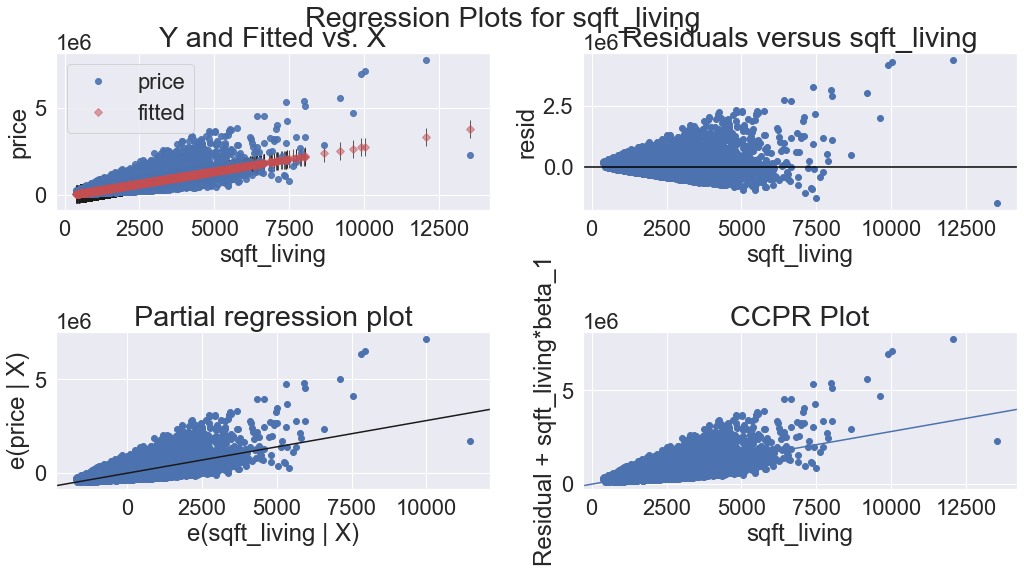

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "sqft_living", fig=fig)
plt.show()

<ipython-input-84-01ac8e8974ba>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


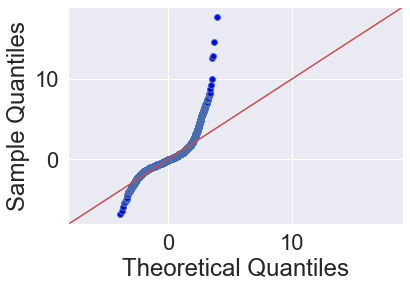

In [84]:
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show();

### Multiple Linear Regression

- Use more than 2 independent variables.
- One-hot encode categorical variables
- Check for multicollinearity

### Model 2
We have included grade, waterfront and condition as they are categorical features in the dataset.

In [85]:
# Define features and the target variables
y = kc_house_data['price'] # Target
X = kc_house_data[['waterfront', 'grade', 'condition', 'sqft_living']] # Feature columns
X

,waterfront,grade,condition,sqft_living
0,0,7 Average,Average,1180
1,0,7 Average,Average,2570
2,0,6 Low Average,Average,770
3,0,7 Average,Very Good,1960
4,0,8 Good,Average,1680
...,...,...,...,...
21592,0,8 Good,Average,1530
21593,0,8 Good,Average,2310
21594,0,7 Average,Average,1020
21595,0,8 Good,Average,1600


In [86]:
X = pd.get_dummies(X, drop_first=True)
X

,waterfront,sqft_living,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,0,1180,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,2570,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,770,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1960,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1530,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21593,0,2310,0,0,0,0,0,0,0,0,1,0,0,0,0,0
21594,0,1020,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,0,1600,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [87]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2257.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:25:50   Log-Likelihood:            -2.9677e+05
No. Observations:               21597   AIC:                         5.936e+05
Df Residuals:                   21580   BIC:                         5.937e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.255e+05   1

#### Model remarks

In this case, R-squared is 0.573, indicating that the model explains 57.3% of the variance in the price.

The adjusted R-squared, 0.573 in this case, suggests that the inclusion of the predictors (waterfront, grade and condition) has improved the model fit.

The high F-statistic (1934) and associated low p-value (0.00) suggest that the overall model is statistically significant.

In terms of coefficients, For example, the coefficient for "waterfront_YES" is 8.464e+05, indicating the expected change in the dependent variable for a one-unit increase in this predictor, holding other variables constant.

For the t-stastistic, larger absolute values indicate more significant predictors. 

ValueError: num must be 1 <= num <= 3, not 4

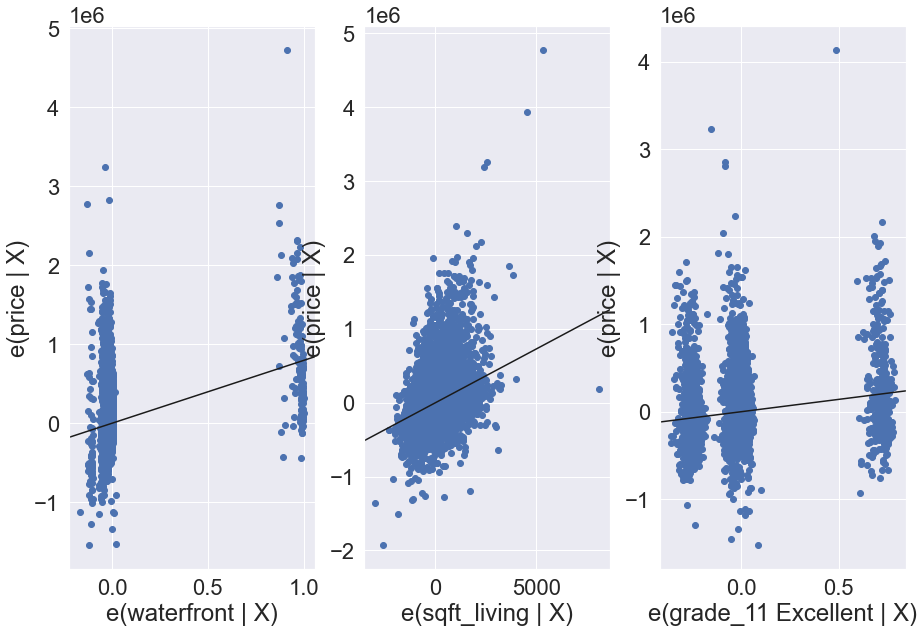

In [91]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(1,3), fig=fig)
plt.tight_layout()
plt.show();

### Model 3
We attempted a new model that included sqft_living, bathrooms, and bedrooms as features.

In [92]:
y = kc_house_data['price'] # Target
X = kc_house_data[['sqft_living', 'bathrooms', 'bedrooms']] # Features
X

,sqft_living,bathrooms,bedrooms
0,1180,1.00,3
1,2570,2.25,3
2,770,1.00,2
3,1960,3.00,4
4,1680,2.00,3
...,...,...,...
21592,1530,2.50,3
21593,2310,2.50,4
21594,1020,0.75,2
21595,1600,2.50,3


In [93]:
model = sm.OLS(y, sm.add_constant(X))
results= model.fit()

In [94]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:29:48   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.639e+04   6956.321     10.981      

#### Model Remarks

The model and coefficients are statistically significant with all p-values well below the standard alpha of *0.05*

The Adjusted R-squared value is about **0.507**  i.e 50.7% of the variance in the target variable *price* can be explained by square foot living, bathrooms and bedrooms.

The intercept is about 7.639e+04 meaning that if we put 0 for square foot living, bathroom and bedrooms we would expect the price to increase by 76390

The coefficient for sqft_living is 310.1848. This implies that, holding other variables constant, for every one-unit increase in square footage of living space (sqft_living), the estimated price (price) is expected to increase by 310.1848 units.

The coefficient for bathrooms is 7659.0953. This suggests that, holding other variables constant, for every additional bathroom, the estimated price is expected to increase by 7659.0953 units. 

The coefficient for bedrooms is -5.857e+04. This implies that, holding other variables constant, for every additional bedroom, the estimated price is expected to decrease by 58,700 units. 

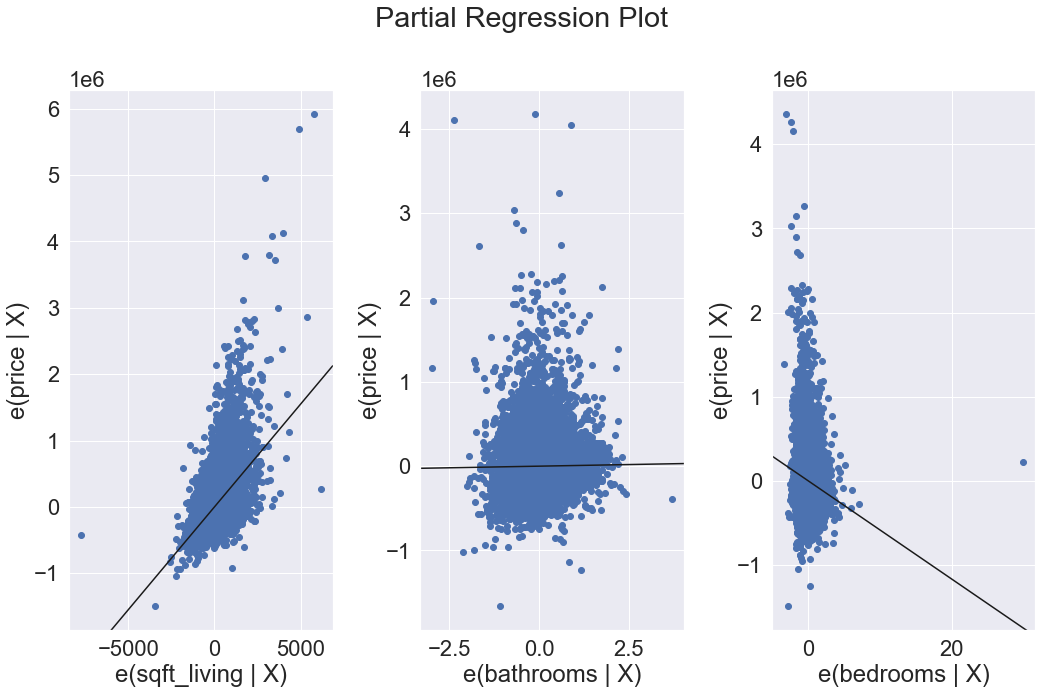

In [95]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(1,3), fig=fig)
plt.tight_layout()
plt.show();

### Model 4
Referencing from the above model, we added grade feature.

In [103]:
# bathroom, bedroom, grade, sqft living
y = kc_house_data['price']
X = kc_house_data[['bedrooms', 'grade', 'bathrooms', 'sqft_living']]
X

,bedrooms,grade,bathrooms,sqft_living
0,3,7 Average,1.00,1180
1,3,7 Average,2.25,2570
2,2,6 Low Average,1.00,770
3,4,7 Average,3.00,1960
4,3,8 Good,2.00,1680
...,...,...,...,...
21592,3,8 Good,2.50,1530
21593,4,8 Good,2.50,2310
21594,2,7 Average,0.75,1020
21595,3,8 Good,2.50,1600


In [104]:
X = pd.get_dummies(X, columns=['grade'], drop_first=True, dtype=int)
X

,bedrooms,bathrooms,sqft_living,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,2310,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,1020,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,1600,0,0,0,0,0,0,0,0,1,0


In [105]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2331.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:55:43   Log-Likelihood:            -2.9792e+05
No. Observations:               21597   AIC:                         5.959e+05
Df Residuals:                   21583   BIC:                         5.960e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.525e+05   1

In this case, R-squared is 0.584, indicating that the model explains 58% of the variance in the price.

The adjusted R-squared, 0.584 in this case, suggests that the inclusion of the predictor, which is sqft living has improved the model fit.

The high F-statistic (2331) and associated low p-value (0.00) suggest that the overall model is statistically significant.

The intercept of $552,500 represents the estimated starting value of house prices.

An additional bedroom is associated with an estimated decrease in price of $22,300.

An additional bathroom is associated with an estimated decrease in price of $7,503.8881.

Each additional square foot of living space is associated with an estimated increase in price of $178.8463.

Houses with an excellent grade (grade_11) are estimated to have a higher price by $278,300.

Houses with grades below 10 (Poor, Low, Fair, Low Average, Average, Good, Better) are estimated to have lower prices compared to those with a grade of 10.

ValueError: num must be 1 <= num <= 4, not 5

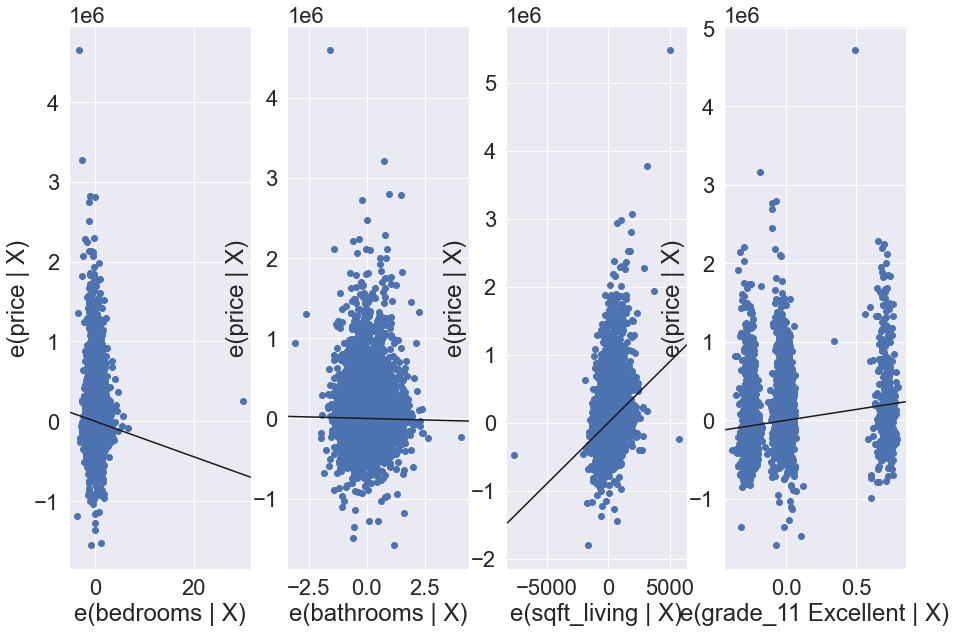

In [119]:
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X.columns), grid=(1,4), fig=fig)
plt.tight_layout()
plt.show();

In [102]:
# This is a model that includes all the features
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + sell_yr'
#Included everything about the house, not the date or the neighborhood.
model = ols(formula=formula, data=kc_house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1656.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:54:32   Log-Likelihood:            -2.9500e+05
No. Observations:               21597   AIC:                         5.901e+05
Df Residuals:                   21568   BIC:                         5.903e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -4.42e+07   6.09e+06     -7.261      0.000   -5.61e+07   -3.23e+07
view[T.EXCELLENT]       1.968e+05   1.57e+04     12.519      0.000    1.66e+05    2.28e+05
view[T.FAIR]            6.619e+04   1.32e+04      4.999      0.000    4.02e+04    9.21e+04
view[T.GOOD]             5.65e+04   1.14e+04      4.949      0.000    3.41e+04    7.89e+04
view[T.NONE]           -5.254e+04   7043.994     -7.459      0.000   -6.63e+04   -3.87e+04
condition[T.Fair]      -2.951e+04   1.62e+04     -1.825      0.068   -6.12e+04    2183.723
condition[T.Good]       1.654e+04   3506.224      4.718      0.000    9668.624    2.34e+04
condition[T.Poor]      -4.083e+04   3.88e+04     -1.052      0.293   -1.17e+05    3.53e+04
condition[T.Very Good]   5.63e+04   5665.315      9.937      0.000    4.52e+04    6.74e+04
grade[T.11 Excellent]   2.714e+05   1.23e+04     22.044      0.000    2.47e+05    2.96e+05
grade[T.12 Luxury]      7.395e+05   2.35e+04     31.443      0.000    6.93e+05    7.86e+05
grade[T.13 Mansion]     1.938e+06   5.89e+04     32.909      0.000    1.82e+06    2.05e+06
grade[T.3 Poor]        -5.957e+05   2.07e+05     -2.872      0.004      -1e+06   -1.89e+05
grade[T.4 Low]         -5.461e+05   4.12e+04    -13.264      0.000   -6.27e+05   -4.65e+05
grade[T.5 Fair]         -5.57e+05   1.64e+04    -33.914      0.000   -5.89e+05   -5.25e+05
grade[T.6 Low Average] -5.042e+05   1.02e+04    -49.518      0.000   -5.24e+05   -4.84e+05
grade[T.7 Average]     -4.225e+05   8433.190    -50.097      0.000   -4.39e+05   -4.06e+05
grade[T.8 Good]        -3.317e+05   7721.074    -42.961      0.000   -3.47e+05   -3.17e+05
grade[T.9 Better]      -1.842e+05   7600.495    -24.238      0.000   -1.99e+05   -1.69e+05
bedrooms               -2.488e+04   1990.423    -12.498      0.000   -2.88e+04    -2.1e+04
bathrooms               4.935e+04   3353.532     14.717      0.000    4.28e+04    5.59e+04
sqft_living              112.4325     18.593      6.047      0.000      75.989     148.876
sqft_lot                  -0.2447      0.035     -6.957      0.000      -0.314      -0.176
floors                  4.203e+04   3643.571     11.534      0.000    3.49e+04    4.92e+04
waterfront              5.306e+05    2.1e+04     25.276      0.000    4.89e+05    5.72e+05
sqft_above                15.8309     18.563      0.853      0.394     -20.554      52.215
sqft_basement             42.8053     18.434      2.322      0.020       6.674      78.936
yr_built               -3262.8301     65.785    -49.598      0.000   -3391.774   -3133.886
sell_yr                 2.541e+04   3022.121      8.408      0.000    1.95e+04    3.13e+04
==============================================================================
Omnibus:                    12548.021   Durbin-Watson:                   1.974
Prob(Omnibus)

### Model 5

Checking for multicolinearity in numerical variables which was present in sqft living and bathrooms and sqft living and sqft above.

In [120]:
predictors = kc_house_data.drop(columns=['price'])
predictors.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sell_yr
0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,0.0,1955,98178,2014
1,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,2170,400.0,1951,98125,2014
2,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,770,0.0,1933,98028,2015
3,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,1050,910.0,1965,98136,2014
4,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,1680,0.0,1987,98074,2015


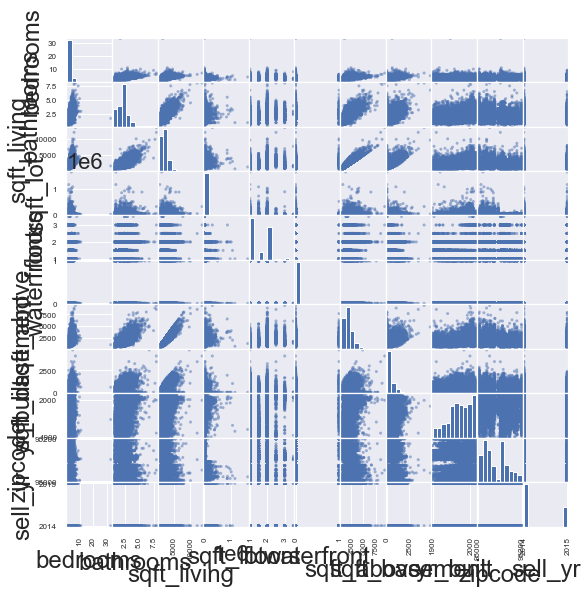

In [121]:
# creating a scatter matrix for the KC house data
pd.plotting.scatter_matrix(predictors, figsize=[9, 9]);
plt.show()

In [122]:
# creating the correlation matrix
predictors.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,zipcode,sell_yr
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.297229,0.155670,-0.154092,-0.009949
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.278485,0.507173,-0.204786,-0.026577
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.428660,0.318152,-0.199802,-0.029014
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.015031,0.052946,-0.129586,0.005628
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,-0.241866,0.489193,-0.059541,-0.022352
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,0.083050,-0.024487,0.028923,-0.005018
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,-0.051175,0.424037,-0.261570,-0.023782
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,-0.051175,1.000000,-0.130085,0.073271,-0.014997
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,0.424037,-0.130085,1.000000,-0.347210,0.003574
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.028923,-0.261570,0.073271,-0.347210,1.000000,0.001290


In [123]:
# Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix:
abs(predictors.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,zipcode,sell_yr
bedrooms,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False


In [126]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df = predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace=True)

# set index to pairs
df.drop(columns=['level_1', 'level_0'], inplace=True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

In [128]:
df[(df.cc > .75) & (df.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(bathrooms, sqft_living)",0.755758


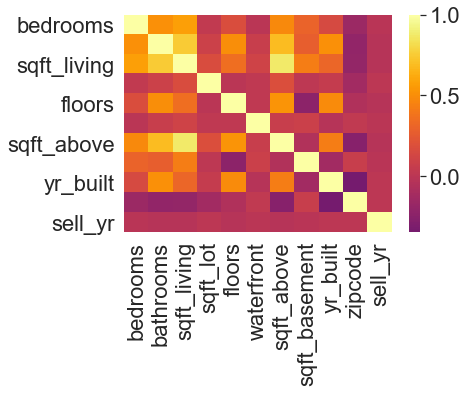

In [138]:
# Heatmap to render the correlation matrix as a visualization.
heatmap = predictors.corr()
cmap = 'inferno'
sns.heatmap(predictors.corr(), cmap=cmap, center=0)
plt.show()

sqft_living is highly correlated with bathrooms and sqft_above. These features will be dropped from the predictive model due to collinearity.

Checking for multicolinearity in categorical variables using the Variance Inflation Factor (VIF) method. Grade_7 average and Grade_8 Good were high.



In [146]:
# check multicolinearity for categorical features 
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df contains both numerical and categorical features
# Extracting categorical features
categorical_features = kc_house_data[['waterfront', 'condition', 'grade']]

# Convert categorical features to dummy variables
categorical_features = pd.get_dummies(categorical_features, drop_first=True)

# Combine dummy variables with numerical features
X = pd.concat([kc_house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']], categorical_features], axis=1)


# Add a constant term
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

               Variable        VIF
0                 const  75.148182
1              bedrooms   1.692976
2             bathrooms   2.976695
3           sqft_living   4.432537
4              sqft_lot   1.050477
5                floors   1.559420
6            waterfront   1.023996
7        condition_Fair   1.026185
8        condition_Good   1.146450
9        condition_Poor   1.016063
10  condition_Very Good   1.079435
11   grade_11 Excellent   1.376243
12      grade_12 Luxury   1.134918
13     grade_13 Mansion   1.045900
14         grade_3 Poor   1.002943
15          grade_4 Low   1.061249
16         grade_5 Fair   1.473034
17  grade_6 Low Average   4.256781
18      grade_7 Average   8.300158
19         grade_8 Good   5.837710
20       grade_9 Better   3.072810


Variance Inflation Factor (VIF) values above 5 to 10 may indicate a high level of multicollinearity. Our categorical features i.e waterfront and condition show that they have a low level of multicolinearity hence they are okay. But grade_7 Average and grade_8 Good have a high level of multicolinearity.

In [154]:
# Interaction
X_sk = pd.get_dummies(kc_house_data, columns=['grade'], drop_first=True, dtype=int)
X_sk

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,1180,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,2170,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,770,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,1050,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,1680,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,1530,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,2310,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,1020,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,1600,...,0,0,0,0,0,0,0,0,1,0


In [155]:
X_sk.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'sell_yr', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [159]:
# creating an interaction column for bathrooms and grade
# because there is multicollinearity
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Features before including interaction term
X_before = X_sk[['waterfront', 'grade_7 Average', 'sqft_living', 'bathrooms']]

# Create an interaction term between 'bathroom' and 'grade'
X_sk['interaction'] = X_sk['bathrooms'] * X_sk['grade_7 Average']

# Features after including interaction term
X_after = X_sk[['waterfront', 'grade_7 Average', 'sqft_living', 'interaction']]

# Perform train-test split
X_train_before, X_test_before, y_train, y_test = train_test_split(X_before, y, random_state=1)
X_train_after, X_test_after, _, _ = train_test_split(X_after, y, random_state=1)  # Use the same random_state
# Model without interaction term
lm_before = LinearRegression().fit(X_train_before, y_train)
lm_preds_before = lm_before.predict(X_test_before)

# Model with interaction term
lm_after = LinearRegression().fit(X_train_after, y_train)
lm_preds_after = lm_after.predict(X_test_after)

# Print R-squared values
print('R^2 before interaction term:', r2_score(y_test, lm_preds_before))
print('R^2 after interaction term:', r2_score(y_test, lm_preds_after))

R^2 before interaction term: 0.5436319347080685
R^2 after interaction term: 0.5581055788827652


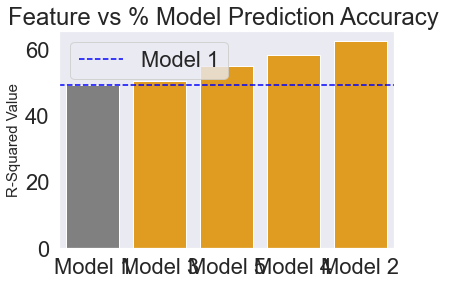

In [165]:
# Models and their respective R-squared values
models = ['Model 1', 'Model 3', 'Model 5', 'Model 4', 'Model 2']
models_num = [49.3, 50.7, 55, 58.4, 62.6]
clrs = ['grey' if x <= 49.3 else 'orange' for x in models_num]
sns.barplot(x=models, y=models_num, palette=clrs)
plt.axhline(y=49.3, color='blue', linestyle='--', label='Model 1')  # Add a line for Model 1
plt.ylabel('R-Squared Value', size=15)
plt.legend()
sns.set_style('dark')
plt.title('Feature vs % Model Prediction Accuracy ')
plt.show()

### 5. Regression Results

The results of our complete analysis were as follows;

**Model 1**
The feature square footage living space which is highly correlated with prices for the house has a highest impact on the R-squared.

**Model 2**
Waterfront presence positively influences house prices, indicating higher prices for houses with a waterfront.

Building grade exhibits a strong positive correlation with house prices, with higher-grade categories associated with elevated property values.

Lower-grade categories in building grades are negatively correlated, implying that houses with lower grades tend to have lower prices.

The 'Fair' condition category negatively impacts house prices, suggesting that houses in fair condition are associated with lower values.

Moderate condition categories show coefficients indicating moderate impacts on house prices, reflecting their influence on property values.

**Model 3**
The features bedrooms brings about a decrease in price while for the feature bathrooms  it brings about an additional increase in price.

**Model 4**
The features bedrooms and bathrooms  was negatibely correlated with the house prices, analysis shows additional of these features led to decrease in price this is due to the inclusion of the feature grade.

Houses with an excellent grade (grade_11) are estimated to have a higher price while houses with grades below 10 (Poor, Low, Fair, Low Average, Average, Good, Better) are estimated to have lower prices compared to those with a grade of 10.

**Model 5**
sqft_living is highly correlated with bathrooms and sqft_above. These features will be dropped from the predictive model due to collinearity.

Our categorical features i.e waterfront and condition show that they have a low level of multicolinearity hence they are okay. But grade_7 Average and grade_8 Good have a high level of multicolinearity.

The interaction between bathrooms and grade was significant accounting for improvement of the model.

### 6.Conclusion and Recommendation

Our best model which is model 2, had an R-squared value of 0.626, telling us that the model fit the data with an accuracy of 63%. 

Square foot of living space, building grade, waterfront and condition all play a valuable role in predicting the price of a house in King County.

The prob(F-statistic) of 0.00 tells us that our regression is meaningful. With ans alpha of 0.05, our p-values for our features are well below our alpha or significance level, showing that they are each contributing to the model significantly.

Our recommendations are as follows:

* Increasing the square-footage of living space*
Focus on increaing the sqaure footage of the living spaces this is because larger living spaces attract higher prices in the real estate market.

* Attain the highest possible building grade*
Achieve the highest possible grade  for houses because high quality construction whith high end grade attracts customers hence increases the prices of the houses. 

* Build and develop homes in close proximity to the waterfront*
From the data we have discovered that waterfronts are desired by most customers this is because waterfronts can offer very scenic views. Investing in properties which are near waterfronts will attract higher prices in the real estaste market.

* Attain the highest possible condition*
The condition of a house greatly impacts the value of a house. Achieving the highest possible condition of the house such as regualr mainetnance and upgrades of the house, the aesthetics will greatly impact the value of the house.

By following the above recommendations, Renaissance Realty can increase their chances of selling higher-priced homes home-owners selling their houses will get higher return on investments.

In the future, our next steps would be;
1. Ensuring that the highest grade and condition of the houses have been attained.

2. Investigate features other than waterfront such as proximity to social amenities, that would increase the property values of the houses. Analyze the market data and identify emerging trends and preferences.

3. Conducting feedbacks and surveys- Gather feedbacks from homebuyers and clients to gain insight into the factors that influence their decision of purchasing houses.

4. Collaboration and Partnership - Collaborating with other real estate companies and investors to gain insight and knowledge on emerging trends in the real estate market.

By implementing these recommendations and further analyses, Renaissance Realty can confidently help their clients sell high value properties and help homeowners improve and renovate their houses in order to get higher return on investments.